In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df = pd.read_csv("../data/silver.csv")

# 1 Analyses univariées

## variables catégorielles

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [5]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [11]:
cat_variable = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod','Churn']

In [12]:
df_cat = df[cat_variable]

In [13]:
df_cat.describe()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,Male,No,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,3555,5901,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,5174


In [15]:
for categorie in cat_variable:
    print(f"répartion de {categorie}")
    print(df[categorie].value_counts())

répartion de gender
Male      3555
Female    3488
Name: gender, dtype: int64
répartion de SeniorCitizen
No     5901
Yes    1142
Name: SeniorCitizen, dtype: int64
répartion de Partner
No     3641
Yes    3402
Name: Partner, dtype: int64
répartion de Dependents
No     4933
Yes    2110
Name: Dependents, dtype: int64
répartion de PhoneService
Yes    6361
No      682
Name: PhoneService, dtype: int64
répartion de MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
répartion de InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
répartion de OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64
répartion de OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64
répartion de DeviceProtection
No                    

# 2 analyses bivariées

Explique bien:
- type de contrat (mois par mois ça churn)
- ancienneté (les plus récents churn)
- Senior CItizen les vieux restent
  

Correlation positive entre variables explicatives:
- Montly charges et Internet services Attention
- Streaming Movie et TV
- Multiple lines phone services la meme chose.

Peu de pouvoir explicatif:
- genre.
  

## Analyse des corrélations

In [18]:
from dython.nominal import associations
from dython.nominal import identify_nominal_columns

In [19]:
complete_correlation= associations(df,compute_only=True)

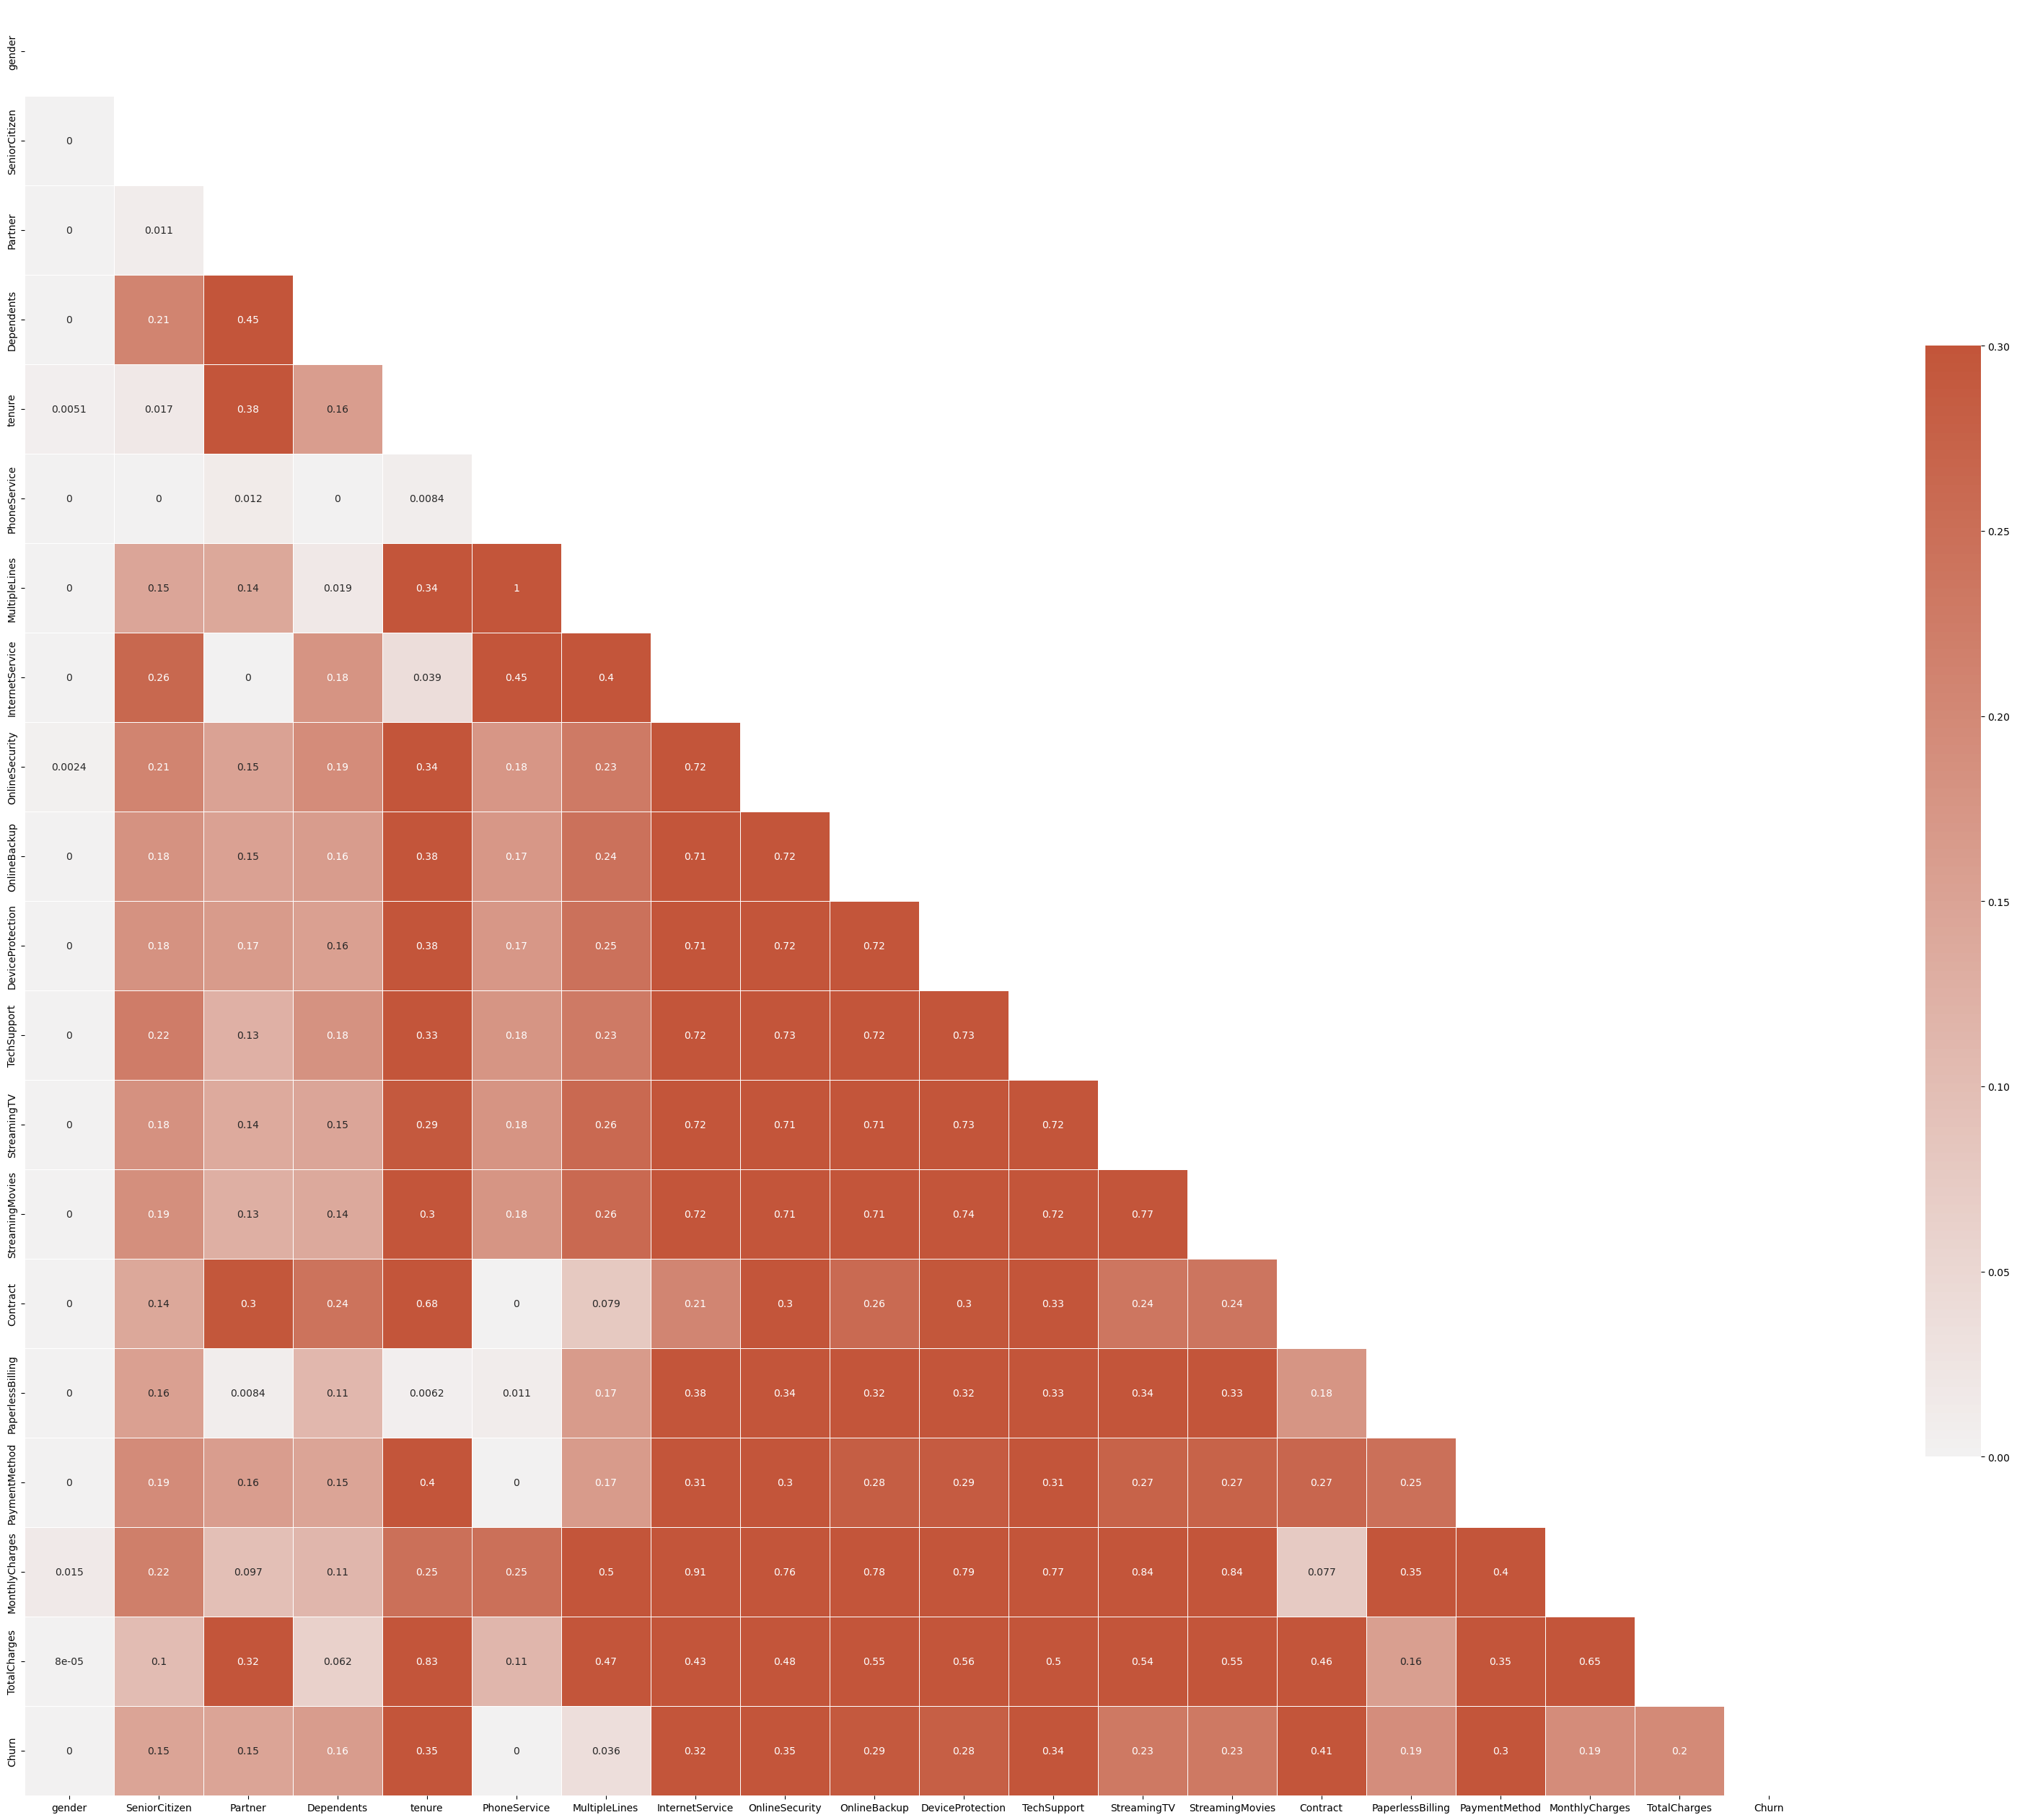

In [26]:
mask = np.triu(np.ones_like(complete_correlation['corr'], dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(40, 40))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(complete_correlation['corr'], mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, annot=True,linewidths=.5, cbar_kws={"shrink": .5})

plt.savefig("corr_matrice.png")

In [ ]:
df.columns

Index(['MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Lot Shape',
       'Land Contour', 'Lot Config', 'Neighborhood', 'Bldg Type',
       'House Style', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Roof Style', 'Exterior 1st', 'Exterior 2nd',
       'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual', 'Exter Cond',
       'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating QC', 'Central Air', 'Electrical', '1st Flr SF', '2nd Flr SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Full Bath', 'Half Bath',
       'Bedroom AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Fireplaces',
       'Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Garage Cars',
       'Garage Area', 'Paved Drive', 'Wood Deck SF', 'Enclosed Porch',
       'Mo Sold', 'Yr Sold', 'Sale Condition', 'SalePrice'],
      dtype='object')

In [ ]:
sub_selection = ['Neighborhood', 'Overall Qual', 'Year Built',
       'Exter Qual', 'Bsmt Qual', 'Total Bsmt SF','1st Flr SF', 
       'Gr Liv Area', 'Full Bath', 'Kitchen Qual',  'Garage Finish', 'Garage Cars',
       'Garage Area', 'SalePrice']

In [ ]:
df_sub_selection = df[sub_selection]

<AxesSubplot:>

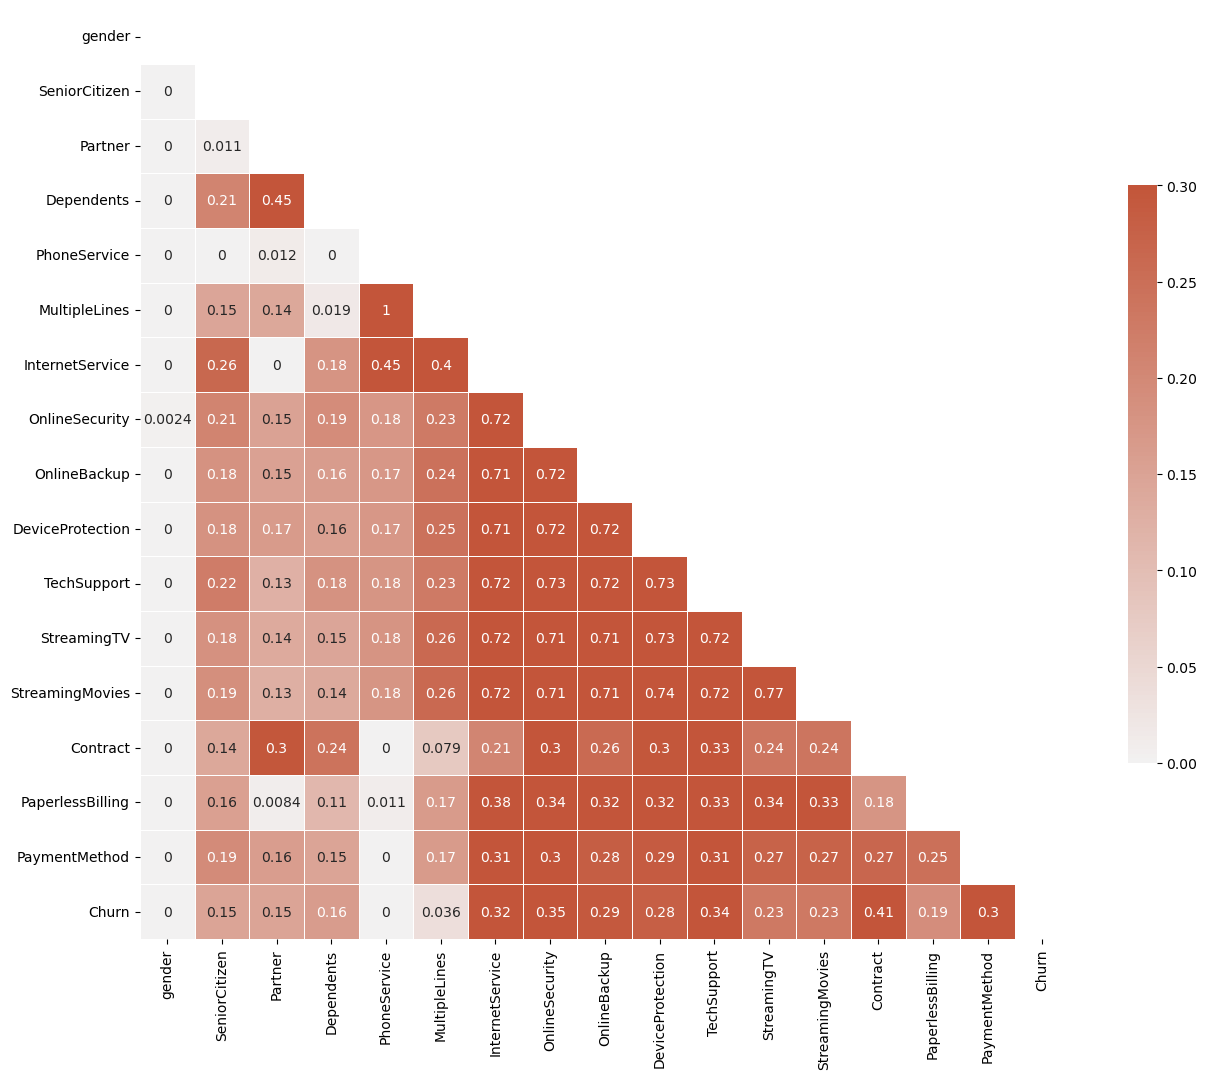

In [27]:
sub_correlation= associations(df_cat,compute_only=True)
mask = np.triu(np.ones_like(sub_correlation['corr'], dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(sub_correlation['corr'], mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, annot=True,linewidths=.5, cbar_kws={"shrink": .5})
